# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [25]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df_08=pd.read_csv('clean_08.csv')
df_18=pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [2]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [3]:
#fuel sources in 2008
list(df_08.fuel.unique())

['Gasoline', 'CNG', 'ethanol', 'gas']

In [4]:
#fuel sources in 2018
list(df_18.fuel.unique())

['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas']

Alternative fuels in both are: "CNG" and "ethanol" in 2008, and "Ethanol" and "Electricity" in 2018.

In [5]:
# how many unique models used alternative sources of fuel in 2008
alt_08=df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [6]:
# how many unique models used alternative sources of fuel in 2018
alt_18=df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

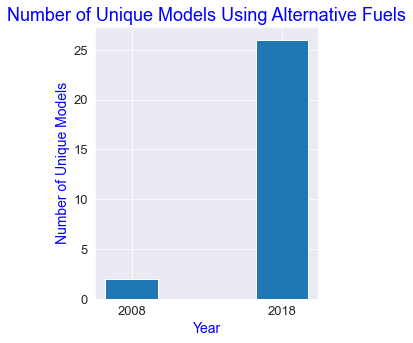

In [7]:
plt.figure(figsize=(4,5))
plt.bar(["2008", "2018"], [alt_08, alt_18],width=0.35)
plt.title("Number of Unique Models Using Alternative Fuels",size=18,color='b')
plt.xlabel("Year",size=14,color='b')
plt.xticks(size=13)
plt.ylabel("Number of Unique Models",size=14,color='b')
plt.yticks(size=13);

 The number of unique models using alternative sources of fuel increased by 24 since 2008.
 

Looking to proportions.

In [8]:
total_08=df_08.model.nunique()
total_18=df_18.model.nunique()
total_08,total_18

(377, 357)

In [9]:
prop_08=alt_08/total_08
prop_18=alt_18/total_18
prop_08,prop_18

(0.005305039787798408, 0.07282913165266107)

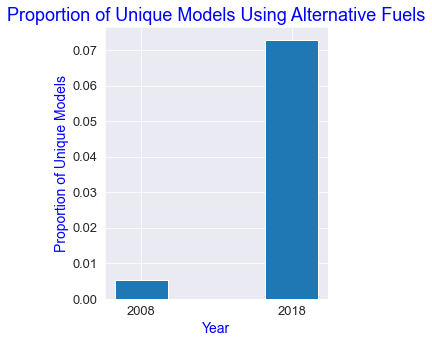

In [10]:
plt.figure(figsize=(4,5))
plt.bar(["2008", "2018"], [prop_08, prop_18],width=0.35)
plt.title("Proportion of Unique Models Using Alternative Fuels",size=18,color='b')
plt.xlabel("Year",size=14,color='b')
plt.xticks(fontsize=13)
plt.ylabel("Proportion of Unique Models",size=14,color='b')
plt.yticks(fontsize=13);

### Q2: How much have vehicle classes improved in fuel economy?  

Average fuel economy for each vehicle class for both years.

In [26]:
vi_08=df_08.groupby('veh_class').cmb_mpg.mean()
vi_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [27]:
vi_18=df_18.groupby('veh_class').cmb_mpg.mean()
vi_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [28]:
# how much they've increased by for each vehicle class
inc= vi_18 - vi_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [29]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
inc

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

In [35]:
inc.index

Index(['large car', 'midsize car', 'minivan', 'pickup', 'small car',
       'station wagon'],
      dtype='object', name='veh_class')

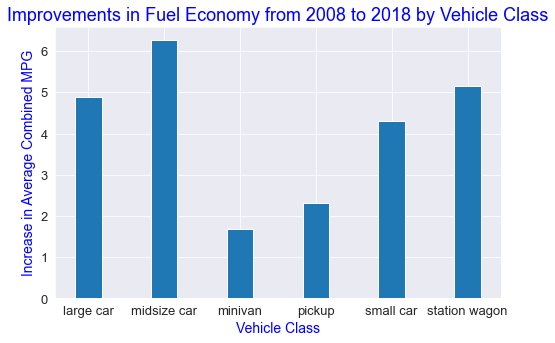

In [15]:
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc,width=.35)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class',size=18,color='b')
plt.xlabel('Vehicle Class',size=14,color='b')
plt.xticks(fontsize=13)
plt.ylabel('Increase in Average Combined MPG',size=14,color='b')
plt.yticks(fontsize=13);

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [16]:
sm_08=df_08.groupby('smartway')[['cmb_mpg','greenhouse_gas_score']].median()
sm_08

,cmb_mpg,greenhouse_gas_score
smartway,,
no,18.0,5
yes,23.0,7


In [17]:
sm_18=df_18.groupby('smartway')[['cmb_mpg','greenhouse_gas_score']].median()
sm_18

,cmb_mpg,greenhouse_gas_score
smartway,,
Elite,46.0,10
No,22.0,4
Yes,32.0,7


In [18]:
#increment in combined mpg and greenhouse gas scores for 2008 and 2018
inc_mpg = sm_18.loc['Yes','cmb_mpg'] - sm_08.loc['yes','cmb_mpg']
inc_gas = sm_18.loc['Yes','greenhouse_gas_score'] - sm_08.loc['yes','greenhouse_gas_score']
inc_mpg,inc_gas

#inc_mpg = sm_18.loc['Yes','cmb_mpg'] + sm_18.loc['Elite','cmb_mpg'] - sm_08.loc['yes','cmb_mpg']
#inc_gas = sm_18.loc['Yes','greenhouse_gas_score'] + sm_18.loc['Elite','greenhouse_gas_score'] - sm_08.loc['yes','greenhouse_gas_score']

(9.0, 0)

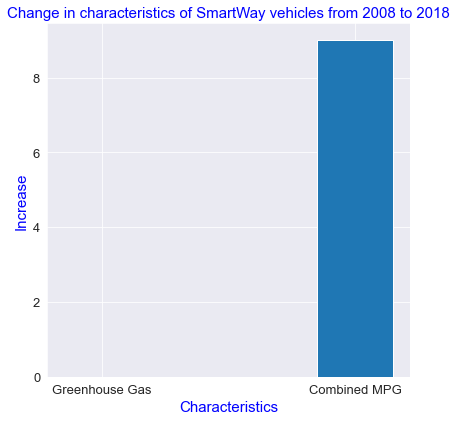

In [19]:
plt.subplots(figsize=(6.5, 6.5))
plt.bar(['Greenhouse Gas','Combined MPG'],[inc_gas,inc_mpg],width=0.30)
plt.title('Change in characteristics of SmartWay vehicles from 2008 to 2018',size=15,color='b')
plt.xlabel('Characteristics',size=15,color='b')       # add ,rotation=90 parameter for rotate labels
plt.xticks(fontsize=13)
plt.ylabel('Increase',size=15,color='b')
plt.yticks(fontsize=13);

We can see that Combined MPG had increased by a median of 9 for SmartWay vehicles in 2018 since 2008, however there was no change to say about Greenhouse Gas Scores for both years.

### Q4: What features are associated with better fuel economy?

In [20]:
fb_08=df_08.query('cmb_mpg > cmb_mpg.mean()')
fb_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [21]:
fb_18=df_08.query('cmb_mpg > cmb_mpg.mean()')
fb_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000
